In [1]:
%load_ext autoreload
%autoreload 2

import logging

logging.basicConfig(level=logging.WARNING)
logging.getLogger('anonymigraph').setLevel(logging.INFO)

In [2]:
from anonymigraph.anonymization import KDegreeAnonymizer
from notebook_utils import generate_power_law_graph

In [3]:
#G = nx.erdos_renyi_graph(1000, 50/1000)

G = generate_power_law_graph(num_nodes = 2000, exponent = 2, random_seed=2) # K-Degree has problems on power law graphs

# Anonymize the Graph G with 100-degree anonymity
k = 100
Ga = KDegreeAnonymizer(k, noise=10, with_deletions=True).anonymize(G, random_seed=31221)

INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 1
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 2
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 3
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 4
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 5
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 6
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 7
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 8
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 9
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 10
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 11
INFO:anonymigraph.anonymization._external.k_degree_anonymity:Attempt number 12
INFO:anonymigraph.anonymization._external.k_degree_anonymity:

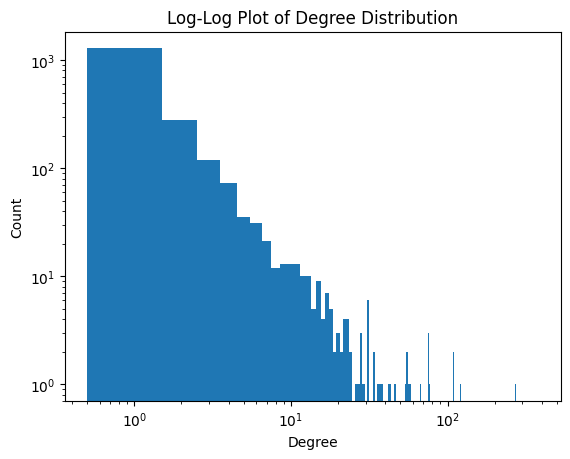

In [4]:
import matplotlib.pyplot as plt

def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(1, max(degrees)+1), density=False, log=True, align='left')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Log-Log Plot of Degree Distribution')
    plt.show()

plot_degree_distribution(G)

In [5]:
from collections import Counter

def evaluate(graph, k):
    """Evaluates the level of k-anonymity on a graph."""

    degree_count = Counter(d for _, d in graph.degree())
    k_anonymous_nodes = sum(count for _, count in degree_count.items() if count >= k)

    print("-"*30)
    print(f"Number of edges: {graph.number_of_edges()}")
    print(f"Percentage of nodes that satisfy {k}-degree anonymity: {k_anonymous_nodes / graph.number_of_nodes():.3f}")
    print(f"Number of isolated nodes: {degree_count[0]}")

k_test = k + 0
evaluate(G, k_test)
evaluate(Ga, k_test)

------------------------------
Number of edges: 3878
Percentage of nodes that satisfy 100-degree anonymity: 0.841
Number of isolated nodes: 0
------------------------------
Number of edges: 3429
Percentage of nodes that satisfy 100-degree anonymity: 1.000
Number of isolated nodes: 0


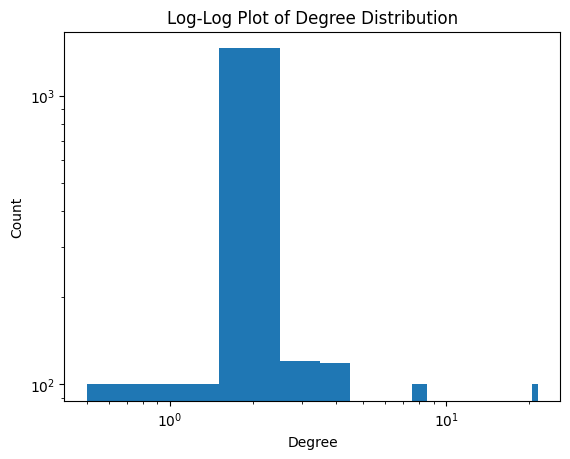

In [6]:
plot_degree_distribution(Ga)